In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Dataset/Assignment2

/content/drive/MyDrive/Dataset/Assignment2


In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns

**Full Name: Nguyen Tran Khuong An**

**Student ID: 22520026**

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit.
Otherwise, check the code carefully.

# Fish Dataset
🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.

**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [4]:
#code here
#Load dữ liệu fish
fish=pd.read_csv('fish.csv')

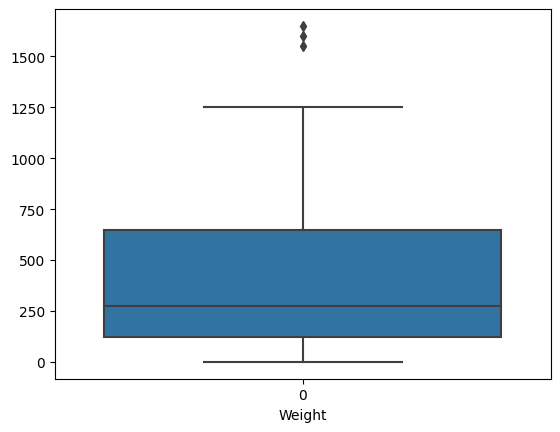

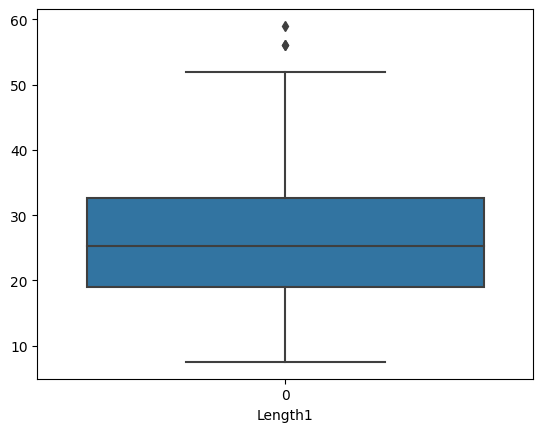

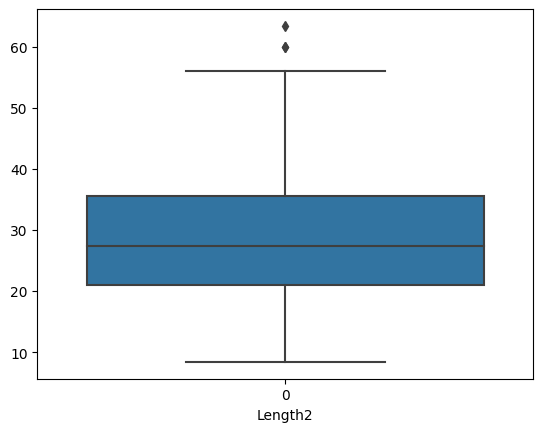

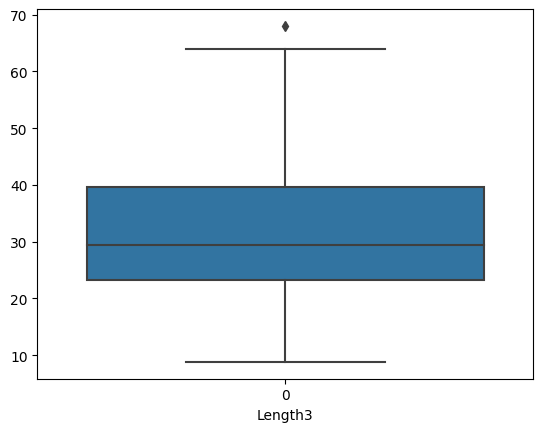

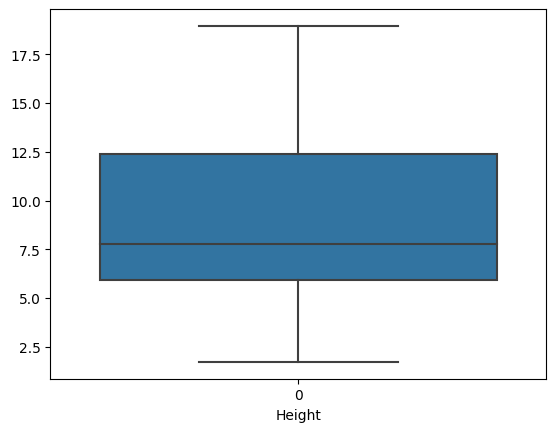

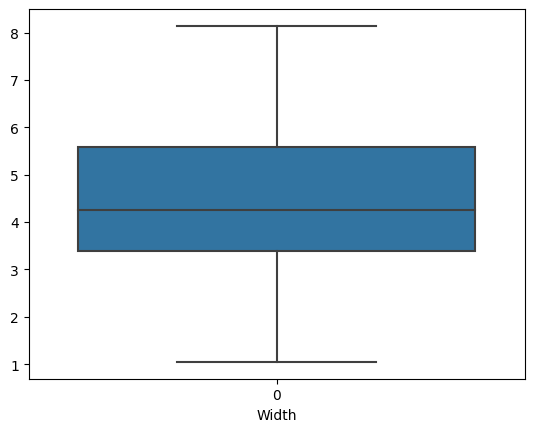

In [5]:
# Sử dụng `boxplot` để vẽ box plot cho từng cột
for i in fish.columns:
  sns.boxplot(fish[i])
  plt.xlabel(i)
  plt.show()


In [6]:
#Xu li du lieu
for feature in fish.columns:
  # Tính IQR của cột dữ liệu hiện tại
  IQR = fish[feature].quantile(0.75) - fish[feature].quantile(0.25)
  #Tính cận trên, cận dưới
  upper = fish[feature].quantile(0.75) + (IQR*1.5)
  lower = fish[feature].quantile(0.25) - (IQR*1.5)
  #Loại bỏ các dữ liệu bất thường
  fish = fish[~((fish[feature] < lower)|(fish[feature] > upper))]
#Sử dụng StandardScaler để scale dữ liệu
scaler = StandardScaler()
name_columns = fish.columns.values
fish[name_columns[1:]] = scaler.fit_transform(fish[name_columns[1:]])
X=fish[name_columns[1:]]
y=fish['Weight']

In [7]:
class LinearRegression_GD:
  def __init__(self, eta=0.004, max_iter=200, random_state=22520026):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.cost_trend = []

  def predict(self, X):
      return np.dot(X, self.w[1:]) + self.w[0]
  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
      self.cost_trend = []
      for iter_i in range(self.max_iter):
          y_pred = self.predict(X)
          diff = y - y_pred  # Compute the differences
          self.w[0] += self.eta * np.sum(diff)  # Update intercept
          self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff
          J = 1/2 * np.sum(diff ** 2)
          self.cost_trend.append(J)

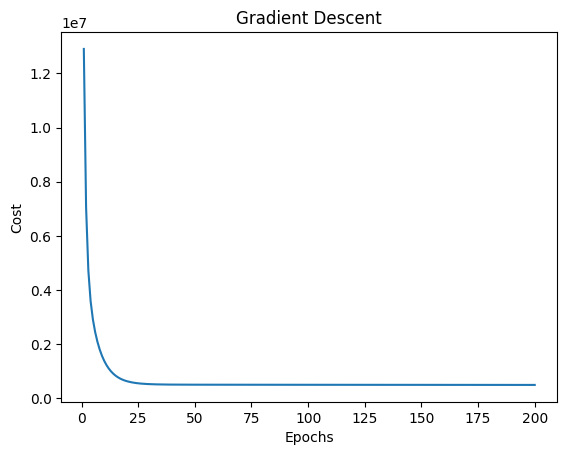

Gia tri r2_score cua Gradient Descent:  0.8769203721214648


In [8]:
# GradientDescent
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7,random_state=22520026)
#huấn luyện mô hình
reg=LinearRegression_GD()
reg.fit(X_train,y_train)

# trực quan hóa giá trị hàm cost
plt.plot(range(1, len(reg.cost_trend) + 1), reg.cost_trend)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()
#dự đoán và hiển thị r2_score
y_fish_predictGD=reg.predict(X_test)
r_fishGD = r2_score(y_test,y_fish_predictGD )
print("Gia tri r2_score cua Gradient Descent: ",r_fishGD)


In [9]:
class NormalEquation():
    def fit(self, X, y):
      self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
      return self.w
    def predict(self, X):
      return np.dot(X, self.w)

In [10]:
#Normal Equation
ones_col = np.ones((len(X),1))
X_new = np.concatenate((ones_col, X), axis=1) #thêm cột 1 vào x
#chi bộ dữ
X_trainNE,X_testNE,y_trainNE,y_testNE= train_test_split(X_new,y, train_size=0.7,random_state=22520026)
#huấn luyện mô hình
model=NormalEquation()
model.fit(X_trainNE,y_trainNE)
#dự đoán và hiển thị r2_score
y_fish_predictNE= model.predict(X_testNE)
r_fishNE = r2_score(y_testNE,y_fish_predictNE )
print('Gia tri r2_score cua Normal Equation: ',r_fishNE)

Gia tri r2_score cua Normal Equation:  0.8946692692903997


# Insurance Dataset
💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance
📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')

**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [11]:
#Load dữ liệu Insurance
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
#Xử lí dữ liệu
# Sử dụng LabelEncoder cho các biến object
for i in insurance.columns:
    if insurance[i].dtype == 'object':
        insurance[i] = LabelEncoder().fit_transform(insurance[i])
#Sử dụng StandardScalser để scale dữ liệu
name = insurance.columns.values
insurance[name[:-1]] = scaler.fit_transform(insurance[name[:-1]])

X_insurance = insurance.drop(columns='charges', axis=1)
y_insurance = insurance['charges']

In [13]:
#Chia bo du lieu
X_ins_train,X_ins_test,y_ins_train,y_ins_test= train_test_split(X_insurance,y_insurance, train_size=0.7,random_state=22520026)

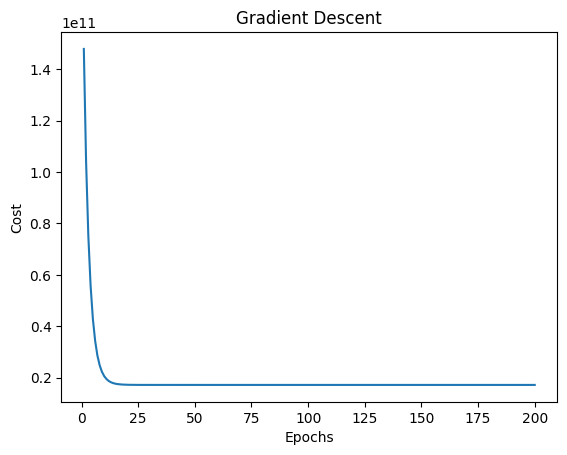

Gia tri r2_score cua Gradient Descent:  0.7679268721997592


In [14]:
#Gradient Descent
#huấn luyện mô hình
reg=LinearRegression_GD(eta=2e-4, max_iter=200, random_state=22520026)
reg.fit(X_ins_train,y_ins_train)
#dự đoán
y_ins_predGD=reg.predict(X_ins_test)
# trực quan hóa giá trị cost trend
plt.plot(range(1, len(reg.cost_trend) + 1), reg.cost_trend)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()
#Hiển thị r2_score
r_insGD= r2_score(y_ins_test,y_ins_predGD)
print("Gia tri r2_score cua Gradient Descent: ",r_insGD)

In [15]:
#Normal Equation
ones_col1 = np.ones((len(X_insurance),1))
X_insurance_new = np.concatenate((ones_col1, X_insurance), axis=1)#Thêm cột 1 vào X
#chia bộ dữ liệu
X_ins_trainNE,X_ins_testNE,y_ins_trainNE,y_ins_testNE= train_test_split(X_insurance_new,y_insurance, train_size=0.7,random_state=22520026)
#huấn luyện mô hình
model= NormalEquation()
model.fit(X_ins_trainNE,y_ins_trainNE)
#dự đoán và hiển thị r2_score
y_ins_predNE=model.predict(X_ins_testNE)
r_insNE=r2_score(y_ins_testNE,y_ins_predNE)
print('Gia tri r2_score cua Normal Equation: ',r_insNE)

Gia tri r2_score cua Normal Equation:  0.7679268721997592


# Tesla Stock Dataset
📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day
📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')

**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [16]:
#Load dữ liệu Insurance
tesla=pd.read_csv('tesla_stock.csv')


In [17]:
#Xu li du lieu
columns_to_scale = tesla.columns.difference(['Close'])
tesla[columns_to_scale] = scaler.fit_transform(tesla[columns_to_scale])
X_tesla = tesla.drop(columns='Close', axis=1)
y_tesla = tesla['Close']

In [18]:
#Chia bo du lieu
from sklearn.model_selection import train_test_split
X_tesla_train,X_tesla_test,y_tesla_train,y_tesla_test= train_test_split(X_tesla,y_tesla, train_size=0.7,random_state=22520026)

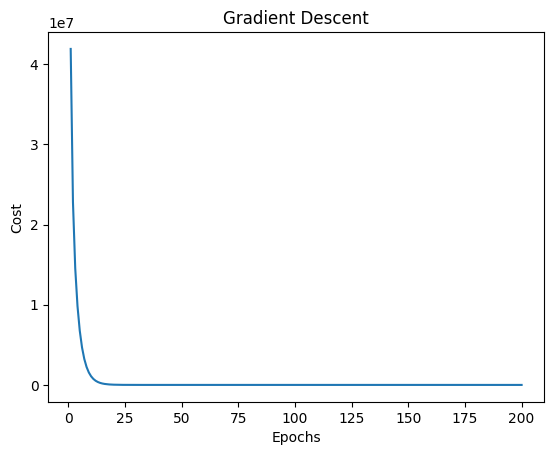

Gia tri r2_score cua Gradient Descent:  0.9992567219748879


In [19]:
#Gradient Descent
reg=LinearRegression_GD(eta=1e-4, max_iter=200, random_state=22520026)
reg.fit(X_tesla_train,y_tesla_train)
# trực quan hóa giá trị cost trend
plt.plot(range(1, len(reg.cost_trend) + 1), reg.cost_trend)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()
#dự đoán và hiển thị r2_score
y_tesla_predGD=reg.predict(X_tesla_test)
r_teslaGD= r2_score(y_tesla_test,y_tesla_predGD)
print("Gia tri r2_score cua Gradient Descent: ",r_teslaGD)

In [20]:
#Normal Equation
one = np.ones((len(X_tesla),1))
X_tesla_new = np.concatenate((one, X_tesla), axis=1)# thêm cột 1 vào X
#chia bộ dữ liệu
X_tesla_trainNE,X_tesla_testNE,y_tesla_trainNE,y_tesla_testNE= train_test_split(X_tesla_new,y_tesla, train_size=0.7,random_state=22520026)
#huấn luyện mô hình
model.fit(X_tesla_trainNE,y_tesla_trainNE)
#dự đoán và hiển thị r2_score
y_tesla_predNE=model.predict(X_tesla_testNE)
r_teslaNE=r2_score(y_tesla_testNE,y_tesla_predNE)
print('Gia tri r2_score cua Normal Equation: ',r_teslaNE)

Gia tri r2_score cua Normal Equation:  0.9997462041919656
